In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dhaka Rent.csv')

In [3]:
df.head()

,Area,Rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Area    60 non-null     int64
 1   Rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [5]:
df.isnull().sum()

Area    0
Rent    0
dtype: int64

Text(0.5, 1.0, 'Area Vs. Rent')

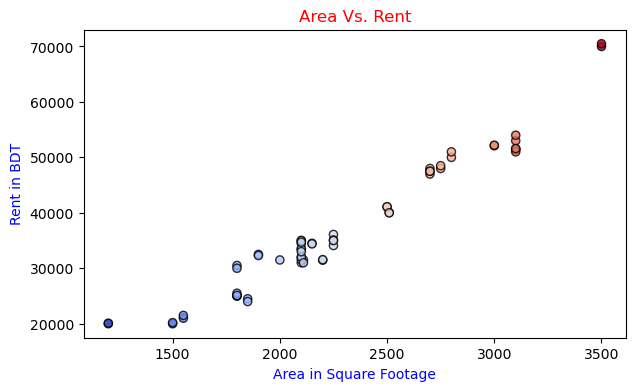

In [6]:
plt.figure(figsize =(7,4)) 
plt.scatter(df['Area'],
            df['Rent'],
           c = df['Area'],
           cmap = 'coolwarm',
           s = 35,
           alpha = .8,
           edgecolor = 'k')
plt.xlabel('Area in Square Footage',color = 'b')
plt.ylabel('Rent in BDT',color = 'b')
plt.title('Area Vs. Rent',color='r')

In [7]:
df.corr()

,Area,Rent
Area,1.000000,0.974807
Rent,0.974807,1.000000


### Linear Regression using Hardcoded formula

In [8]:
x = df['Area']
y = df['Rent']
dev_x = x - np.mean(x)
dev_y = y - np.mean(y)

In [9]:
m = np.sum(dev_x * dev_y)/np.sum(dev_x**2)

In [10]:
c = np.mean(y) - m*np.mean(x)

In [11]:
df.head()

,Area,Rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


### Some predicted Rent

In [12]:
m * 2100 + c

np.float64(33244.85364815401)

In [13]:
m * 3300 + c

np.float64(58796.04741648834)

In [14]:
m * 4000 + c

np.float64(73700.91044801672)

### Linear Regression Using SKLEARN

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [16]:
reg.fit(df[['Area']],y)

LinearRegression()

In [17]:
reg.coef_[0]

np.float64(21.292661473611965)

In [18]:
reg.intercept_

np.float64(-11469.735446431121)

In [19]:
reg.predict([[2100]])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33244.85364815])

In [20]:
reg.predict(df[['Area']])

array([31115.58750079, 33244.85364815, 41761.9182376 , 36438.7528692 ,
       52408.2489744 , 28986.32135343, 20469.25676399, 27921.68827975,
       46020.45053232, 33244.85364815, 34309.48672183, 33244.85364815,
       33244.85364815, 41974.84485233, 36438.7528692 , 54537.51512177,
       26857.05520607, 21533.88983767, 26857.05520607, 46020.45053232,
       33457.78026289, 33244.85364815, 63054.57971121, 14081.4583219 ,
       48149.71667968, 54537.51512177, 47085.083606  , 26857.05520607,
       35374.11979552, 54537.51512177, 33244.85364815, 33244.85364815,
       41761.9182376 , 36438.7528692 , 52408.2489744 , 28986.32135343,
       20469.25676399, 27921.68827975, 46020.45053232, 33244.85364815,
       34309.48672183, 33244.85364815, 33244.85364815, 41974.84485233,
       36438.7528692 , 54537.51512177, 26857.05520607, 21533.88983767,
       26857.05520607, 46020.45053232, 33457.78026289, 33244.85364815,
       63054.57971121, 14081.4583219 , 48149.71667968, 54537.51512177,
      

In [21]:
df2 = df.copy()
df2['Predicted'] = reg.predict(df[['Area']])
df2.tail()

,Area,Rent,Predicted
55,3100,54000,54537.515122
56,2750,48500,47085.083606
57,1800,25100,26857.055206
58,2200,31560,35374.119796
59,3100,51600,54537.515122


In [22]:
df2.head()

,Area,Rent,Predicted
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [23]:
X = df[['Area']]

In [24]:
reg.score(X, y)

0.950249380357677

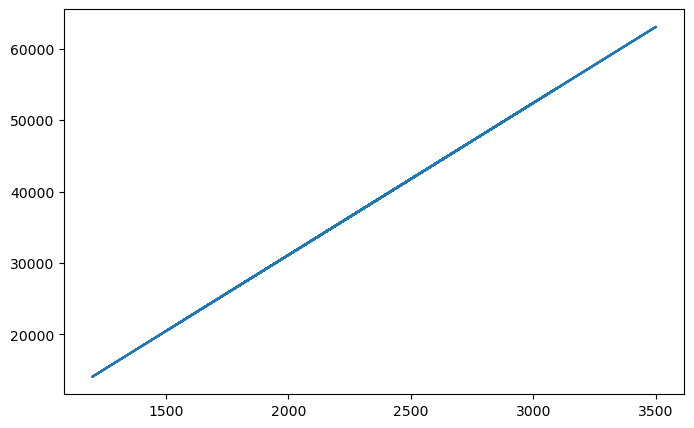

In [25]:
plt.figure(figsize = (8,5))
plt.plot(x, reg.predict(X)) # where x = df['Area'] and X = df[['Area']]

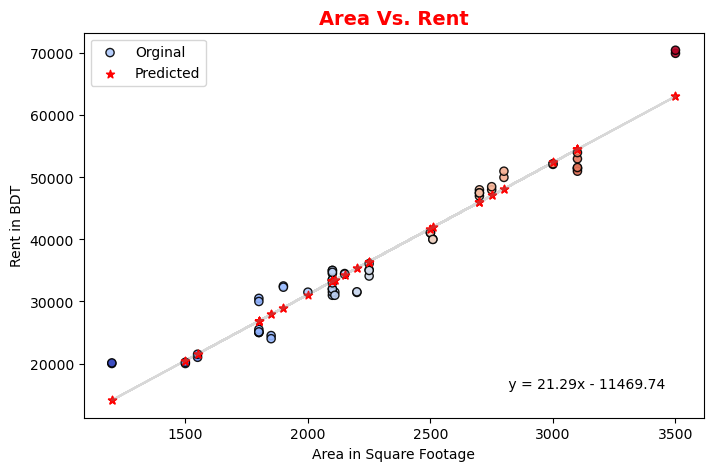

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(x,y,    # x = df['Area'] and y = df['Rent']
           c = x,
           cmap = 'coolwarm',
           s = 35,
           alpha = .9,
           edgecolor= 'k',
           label = 'Orginal') 
if c>=0:
    eqn = f" y = {float(m):.2f}x + {abs(float(c)):.2f}"
else:
    eqn = f" y = {float(m):.2f}x - {abs(float(c)):.2f}"
plt.text(max(x)-700, min(y)-4000,eqn)

plt.plot(x, reg.predict(X),color = 'grey',alpha = .3)
plt.scatter(x,
            reg.predict(X),    # X= df[['Area']]
           marker = '*',
           color= 'r',
           label = 'Predicted')
plt.xlabel('Area in Square Footage')
plt.ylabel('Rent in BDT')
plt.title('Area Vs. Rent', color = 'r', weight = 'bold', fontsize = 14)
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
mean_squared_error(df2['Rent'],df2['Predicted'])

6778077.204095561

In [29]:
mean_absolute_error(df2['Rent'],df2['Predicted'])

2009.8695093576284